# Practical 1: Power Balancing for a Local Community

```{warning}
This tutorial serves as an example on how to include Jupyter notebooks into the documentation. The tooling required to reproduce it is not part of the `illuminator` yet.
```

#### Importing the needed packages
The first step in every python notebook is to install the needed packages (e.g. [`pandas`](https://pandas.pydata.org/docs/user_guide/index.html) for data management) as well as functions and classes from external scripts. For this practical assignment the class simulation_creator_Balancing is used to simplify the set-up of simulations of different energy systems.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import functions_T1

#Importing the Simulation script
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.insert(0, parent_dir)
from simulation_creator_T1_Balancing import simulation_creator_Balancing

In this tutorial a neighbourhood is connected to the grid as sketched below. For a typical day in the year the neighbourhood has a given demand profile (load_data.txt file). The given load data is for a year and is given in 15 minute intervals. This electricity demand must be fulfilled.

#### Task 1: Load Profile for a Neighbourhood

In the first task entails the neighbourhood takes all electricity from the grid. The demand of the neighbourhood can be visualized in a load profile for a day of choice. The following python code plots a specified day based on the given load data and the specified number of houses in the neighbourhood. Electricity from the grid comes from various sources. The energy mix of the Netherlands can be found under https://www.iea.org/countries/the-netherlands/energy-mix. In the code the load data is first saved in a pandas dataframe and it is ensured that the index is the time. Then the day is chosen and a function is called to plot the load data on this day. Run the code and describe what you can see in the plot. You can vary the day for which you want to plot the load with the day_of_year parameter. 

![T1_basecase](Graphics_T1/T1_basecase.png)

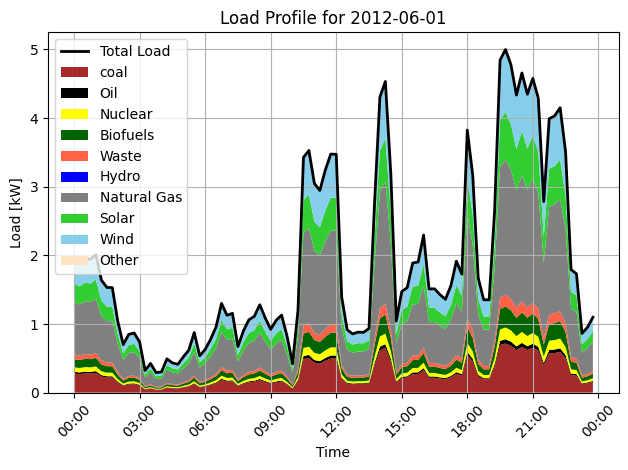

In [2]:
load_df = pd.read_csv('../Scenarios/load_data.txt', delimiter=',', skiprows=1)
load_df['time'] = pd.to_datetime(load_df['time'])
load_df.set_index('time', inplace=True)

#choose which day of the year to plot
day_of_year = "2012-06-01"
number_houses = 5 
plot_load_base_case = functions_T1.plot_load_profile(load_df, day_of_year, number_houses)

The community implements small scale PV and wind power plants to become more autonomous. Now first the supply from the local renewable energy sources is used to cover the demand in the community. The residual load is then supplied by the grid. In case of excess renewable generation the generated electricity is fed into the grid.

![T1_RES_case](Graphics_T1/T1_RES_case.png)

#### Task 2: Neighbourhood with local RES

In the below presented code the neighbourhood is set up by defining the key components (here Wind, PV and Load). After defining number of houses and specifications of the installed wind and solar energy in the neighbourhood, a simulation is created and started with the simulation_creator_Balancing class. Finally, the summarise_results function

Run the following python code and look at the resulting residual load plot. Describe the plot and compare it to the results from task 1. Vary the installed PV and Wind power as well as the number of houses in the neighbourhood. Describe your findings.

In [2]:
%%capture
day_of_year = "2012-06-01"

#Component Set Up
Components_RES_case = pd.Series(['Wind', 'PV', 'Load'])

#Input Data Simulation
number_houses = 5    #demand specs

# Note: PV Inputs are currently in W! -> need to change?
pv_inputs = {'Module_area': 1.26, 'cap':500, 'Power_output_at_STC': 250,'peak_power':0.6}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':0.3, 'cp':0.40}
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}

RES_case_simulation = simulation_creator_Balancing(Components_RES_case, day_of_year,number_houses,pv_inputs, wind_inputs);

2024-11-01 12:38:23.276 | INFO     | mosaik.scenario:start:255 - Starting "Controller" as "Controller-0" ...
2024-11-01 12:38:23.295 | INFO     | mosaik.scenario:start:255 - Starting "Collector" as "Collector-0" ...
2024-11-01 12:38:23.320 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-0" ...
2024-11-01 12:38:24.178 | INFO     | mosaik.scenario:start:255 - Starting "Wind" as "Wind-0" ...
2024-11-01 12:38:24.197 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-1" ...
2024-11-01 12:38:25.074 | INFO     | mosaik.scenario:start:255 - Starting "PV" as "PV-0" ...
2024-11-01 12:38:25.092 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-2" ...
2024-11-01 12:38:25.839 | INFO     | mosaik.scenario:start:255 - Starting "Load" as "Load-0" ...
2024-11-01 12:38:25.850 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
202

To visualize the results from the simulation run the summarize_results() function below each time you modify the inputs:

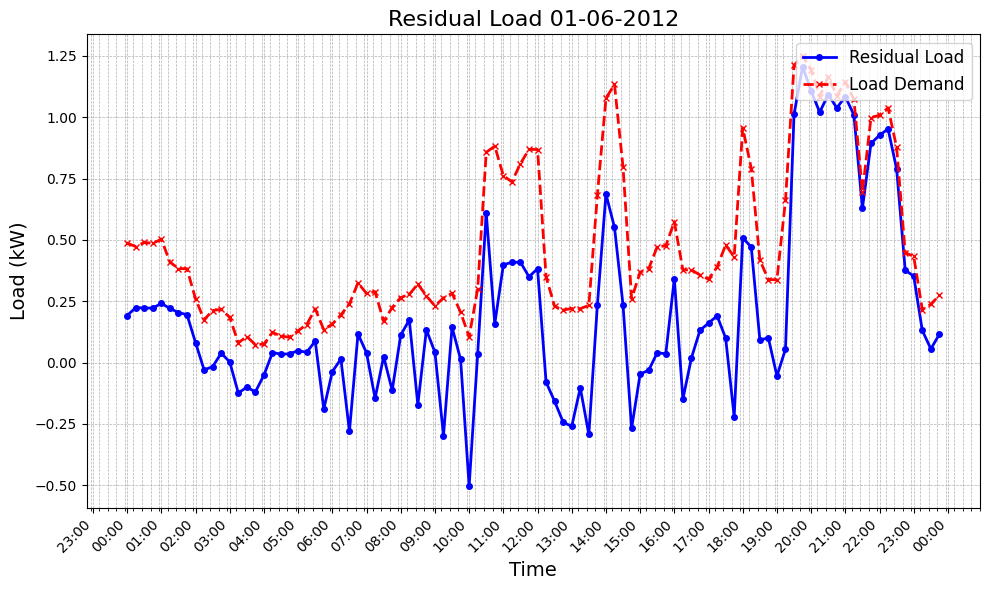

,Residual Load,PV Generation (kW),Wind Generation (kW),Load Demand (kW)
date,,,,
2012-06-01 00:00:00,0.860406,0.000000,1.075314,1.935720
2012-06-01 01:00:00,0.861353,0.000000,0.817498,1.678851
2012-06-01 02:00:00,0.073390,0.000000,0.790373,0.863764
2012-06-01 03:00:00,-0.340568,0.000000,0.784690,0.444122
2012-06-01 04:00:00,0.060149,0.000000,0.349552,0.409701
2012-06-01 05:00:00,-0.011290,0.261893,0.387379,0.637982
2012-06-01 06:00:00,-0.185529,0.511917,0.589874,0.916262
2012-06-01 07:00:00,-0.194884,0.922958,0.234929,0.963003
2012-06-01 08:00:00,0.248383,0.714950,0.172093,1.135426


In [3]:
RES_case_simulation.summarize_results()

The residents have decided to implement a community storage, to enhance the utilization of their local generation. The electricity generated from the local renewable energy sources is stored in the battery when generation exceeds the local demand. The stored energy is used when the local generation cannot cover the demand.

![T1_RES_case_Bat](Graphics_T1/T1_RES_case_Bat.png)

**Task 3 Neighbourhood with local RES and Communal Battery

a) Run the following python code that simulates a typical day in the local community with renewable generation and battery storage. For this task the State of charge is 100% in the beginning of the day. The controller acts in the following way: in the case of not enough local generation to cover the demand of the neighbourhood electricity is taken from the battery storage if possible, if this is not possible electricity is taken from the grid. How does the residual load curve change compared to task 2 (the utilization of small scale local renewable generation without storage).

b) Change the State of charge parameter to 50% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

c): Change the State of charge parameter to 10% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

Note: Changing Objective Controller: Contractual/Physical Limit for connection (Peak shaving & Load Shifting, Load Shedding)
EV/Flexibilities

**State of Charge (SOC) of a Battery**: The State of Charge (SOC) of a battery represents the current charge level relative to its full capacity, typically expressed in percentages.  Thus, SOC=100% means the battery is fully charged and SOC=0% means it is fully discharged. To prevent damage the battery has a minimum and maximum SOC (upper and lower boundary) included in the control logic, that cannot be surpassed.

In [6]:
%%capture
day_of_year = "2012-06-01"

Components_RES_Bat_case = pd.Series(['Wind', 'PV', 'Load', 'Battery'])

print(Components_RES_Bat_case)
#Input Data Simulation
number_houses = 5    #demand specs

pv_inputs = {'Module_area': 1.26, 'installed_capacity': 500, 'Power_output_at_STC': 250}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':0.3, 'cp':0.40} # p-rated in kW
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}


battery_inputs = {'initial_soc': 80, 'charge_efficiency': 0.9, 'discharge_efficiency': 0.9, 'soc_min': 10}
#Options for Battery inputs with example values :{'initial_soc': 20, 'max_p': 800, 'min_p': -800, 'max_energy': 800, 'charge_efficiency': 0.9, 
# 'discharge_efficiency': 0.9, 'soc_min': 10, 'soc_max': 90}

Battery_case_simulation = simulation_creator_Balancing(Components_RES_Bat_case,day_of_year,number_houses,pv_inputs, wind_inputs,battery_inputs)

2024-11-01 16:36:32.392 | INFO     | mosaik.scenario:start:255 - Starting "Controller" as "Controller-0" ...
2024-11-01 16:36:32.396 | INFO     | mosaik.scenario:start:255 - Starting "Collector" as "Collector-0" ...
2024-11-01 16:36:32.400 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-0" ...
2024-11-01 16:36:33.389 | INFO     | mosaik.scenario:start:255 - Starting "Wind" as "Wind-0" ...
2024-11-01 16:36:33.396 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-1" ...
2024-11-01 16:36:34.130 | INFO     | mosaik.scenario:start:255 - Starting "PV" as "PV-0" ...
2024-11-01 16:36:34.138 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-2" ...
2024-11-01 16:36:34.980 | INFO     | mosaik.scenario:start:255 - Starting "Load" as "Load-0" ...
2024-11-01 16:36:34.987 | INFO     | mosaik.scenario:start:255 - Starting "Battery" as "Battery-0" ...
2024-11-01 16:36:34.993 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection betwee

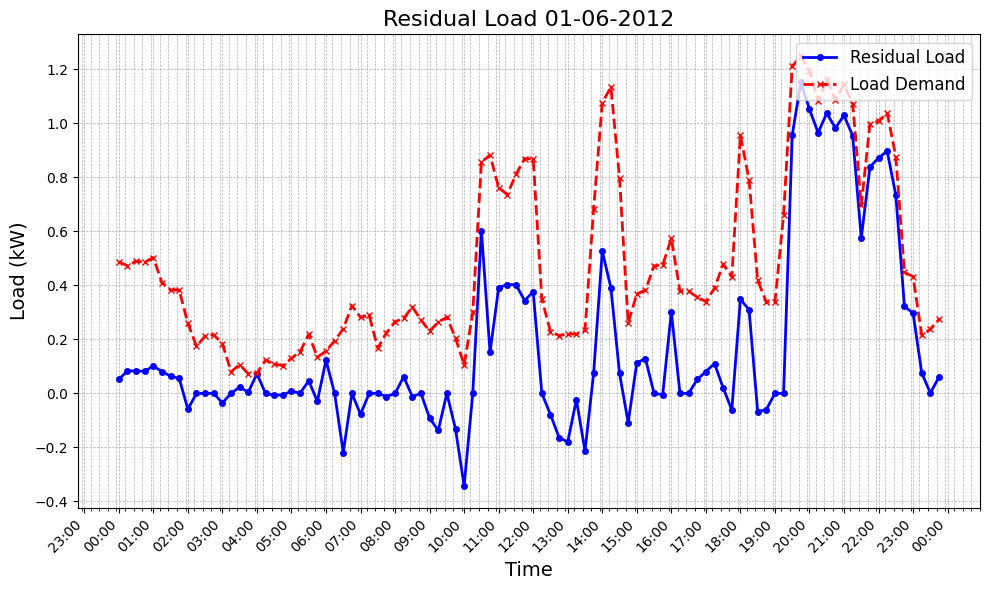

,Flow to Battery (kWh),Residual Load,Dumped Energy,Output Power Battery (kW),Battery SOC (%),PV Generation (kW),Wind Generation (kW),Load Demand (kW)
date,,,,,,,,
2012-06-01 00:00:00,-0.560000,0.300406,-0.300406,-0.041481,10.000000,0.000000,1.075314,1.935720
2012-06-01 01:00:00,-0.560000,0.301353,-0.301353,0.000000,10.000000,0.000000,0.817498,1.678851
2012-06-01 02:00:00,-0.131907,-0.058517,0.058517,-0.000000,42.080500,0.000000,0.790373,0.863764
2012-06-01 03:00:00,0.332968,-0.007600,0.007600,0.047407,70.000000,0.000000,0.784690,0.444122
2012-06-01 04:00:00,0.001042,0.061192,-0.061192,-0.047407,30.000000,0.000000,0.349552,0.409701
2012-06-01 05:00:00,0.037299,0.026010,-0.026010,0.047407,30.000000,0.261893,0.387379,0.637982
2012-06-01 06:00:00,0.089755,-0.095774,0.095774,-0.043962,62.350000,0.511917,0.589874,0.916262
2012-06-01 07:00:00,0.105853,-0.089031,0.089031,0.053116,57.325000,0.922958,0.234929,0.963003
2012-06-01 08:00:00,-0.198286,0.050097,-0.050097,-0.047407,30.000000,0.714950,0.172093,1.135426


In [7]:
Battery_case_simulation.summarize_results()